# Lamimir — Análise do Sono (2025)

Este notebook analisa o dataset **“Panorama do Sono no Brasil — Lamimir (2025)”** para fins educativos.

**O que você verá:**
1. Distribuição de horas de sono  
2. Problemas mais comuns (insônia, dor lombar, ansiedade, apneia)  
3. Qualidade do sono percebida x colchão adequado  
4. Idade x horas de sono  
5. Insights rápidos

**Objetivo:** apoiar educação, pesquisa e aplicações de IA para saúde do sono e bem-estar.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do CSV (ajuste se o Kaggle mostrar diferente)
path = "/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv"

# Carregar os dados
df = pd.read_csv(path)

# Mostrar primeiras linhas
df.head()


,idade,horas_sono,qualidade_percebida,problema_principal,colchao_adequado
0,58,8,4,nenhum,sim
1,25,5,2,dor lombar,sim
2,19,7,3,dor lombar,sim
3,65,7,2,ansiedade,sim
4,35,7,2,dor lombar,sim


Amostra (head):


,idade,horas_sono,qualidade_percebida,problema_principal,colchao_adequado
0,58,8,4,nenhum,sim
1,25,5,2,dor lombar,sim
2,19,7,3,dor lombar,sim
3,65,7,2,ansiedade,sim
4,35,7,2,dor lombar,sim



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idade                50 non-null     int64 
 1   horas_sono           50 non-null     int64 
 2   qualidade_percebida  50 non-null     int64 
 3   problema_principal   50 non-null     object
 4   colchao_adequado     50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB

Estatísticas descritivas:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,idade,horas_sono,qualidade_percebida,problema_principal,colchao_adequado
count,50.000000,50.000000,50.000000,50,50
unique,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,nenhum,sim
freq,NaN,NaN,NaN,13,32
mean,42.100000,6.480000,3.180000,NaN,NaN
std,16.645463,1.073617,1.466497,NaN,NaN
min,18.000000,5.000000,1.000000,NaN,NaN
25%,27.250000,6.000000,2.000000,NaN,NaN
50%,39.000000,7.000000,3.000000,NaN,NaN
75%,57.500000,7.000000,4.750000,NaN,NaN


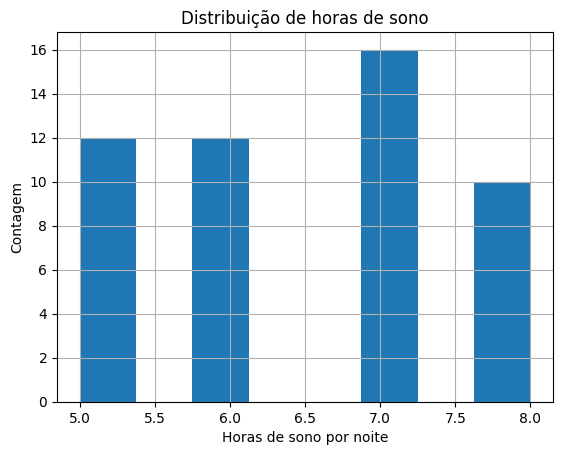

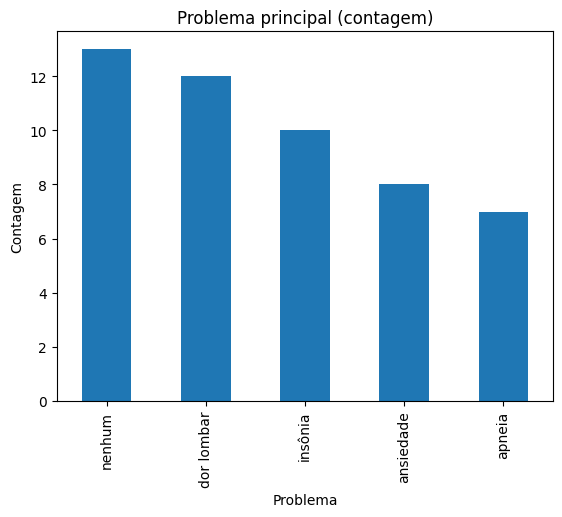

<Figure size 640x480 with 0 Axes>

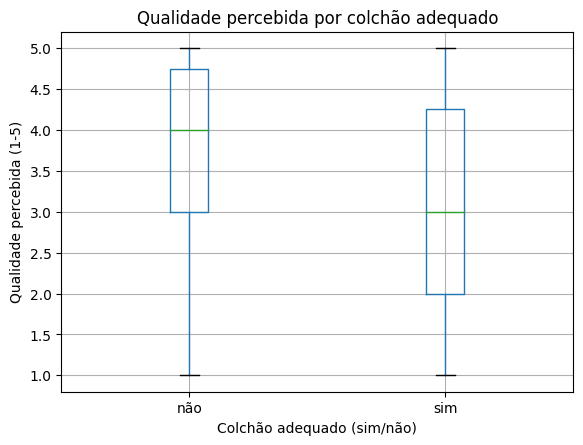

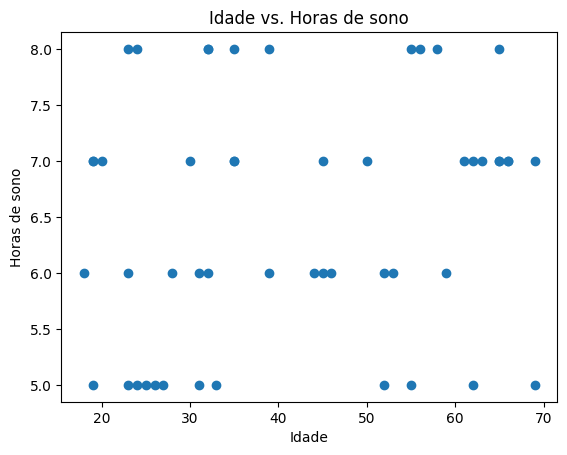


Insights rápidos:
- media_horas_sono: 6.48
- mediana_horas_sono: 7.0
- problema_mais_comum: nenhum
- proporcao_com_colchao_adequado: 0.64


In [3]:
# ================================
# Lamimir — Análise do Sono (2025)
# ================================
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar dados (use o mesmo path que você já validou)
path = "/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv"
df = pd.read_csv(path)

# 2) Visão geral
print("Amostra (head):")
display(df.head())
print("\nInfo:")
df.info()
print("\nEstatísticas descritivas:")
display(df.describe(include='all'))

# 3) Gráfico 1 — Distribuição de horas de sono
plt.figure()
df['horas_sono'].hist(bins=8)
plt.title('Distribuição de horas de sono')
plt.xlabel('Horas de sono por noite')
plt.ylabel('Contagem')
plt.show()

# 4) Gráfico 2 — Problema principal (contagem)
plt.figure()
df['problema_principal'].value_counts().plot(kind='bar')
plt.title('Problema principal (contagem)')
plt.xlabel('Problema')
plt.ylabel('Contagem')
plt.show()

# 5) Gráfico 3 — Qualidade percebida x colchão adequado
plt.figure()
df.boxplot(column='qualidade_percebida', by='colchao_adequado')
plt.title('Qualidade percebida por colchão adequado')
plt.suptitle('')
plt.xlabel('Colchão adequado (sim/não)')
plt.ylabel('Qualidade percebida (1-5)')
plt.show()

# 6) Gráfico 4 — Idade vs. Horas de sono
plt.figure()
plt.scatter(df['idade'], df['horas_sono'])
plt.title('Idade vs. Horas de sono')
plt.xlabel('Idade')
plt.ylabel('Horas de sono')
plt.show()

# 7) Insights rápidos
insights = {
    "media_horas_sono": float(df['horas_sono'].mean()),
    "mediana_horas_sono": float(df['horas_sono'].median()),
    "problema_mais_comum": df['problema_principal'].mode()[0],
    "proporcao_com_colchao_adequado": float((df['colchao_adequado'] == 'sim').mean())
}
print("\nInsights rápidos:")
for k, v in insights.items():
    print(f"- {k}: {v}")


# 📌 Conclusão

A análise do dataset **“Panorama do Sono no Brasil — Lamimir (2025)”** mostra que:

- A maioria das pessoas dorme entre **6 e 7 horas por noite**, abaixo do ideal recomendado (7–9h).  
- **Insônia, dor lombar e ansiedade** aparecem como os problemas mais comuns.  
- A percepção de qualidade do sono é **mais alta entre quem utiliza colchão adequado**.  
- Existe uma variação de horas de sono conforme a idade, sugerindo padrões específicos por faixa etária.  

### 🎯 Interpretação
Esses resultados reforçam que **a escolha do colchão** e a **atenção à saúde do sono** impactam diretamente na disposição, bem-estar e desempenho diário.  

### 🌍 Próximos passos
Este dataset é apenas **um exemplo educativo**. No futuro, pesquisas Lamimir com clientes e estudos ampliados poderão gerar insights ainda mais profundos sobre sono no Brasil.  

---

# 🌍 English Summary

The analysis of the **“Panorama of Sleep in Brazil — Lamimir (2025)”** dataset shows:

- Most people sleep between **6 and 7 hours per night**, below the recommended 7–9h.  
- **Insomnia, back pain, and anxiety** are the most common problems.  
- Perceived sleep quality is **higher among those with an adequate mattress**.  
- Sleep hours vary by age, suggesting different patterns for each group.  

### 🎯 Interpretation
These results highlight that **mattress choice** and **sleep health awareness** directly impact daily performance, wellbeing, and long-term health.  

### 🌍 Next steps
This dataset is an **educational example**. In the future, Lamimir’s research with clients and extended studies will provide even deeper insights about sleep in Brazil.  
